In [ ]:
!jupyter nbconvert Lecture-16.ipynb --to slides --post serve

# Lecture 16:  Analytical Solutions II:  The Laplace Transform and Semi Infinite Media

### Sections

* [Introduction](#Introduction)
* [Learning Goals](#Learning-Goals)
* [On Your Own](#On-Your-Own)
    * The Laplace Transform
    * The Laplace Transform of Derivatives
* [In Class](#In-Class)
    * Solving a PDE using Laplace Transformations
    * Applying the Boundary Conditions
* [Homework](#Homework)
* [Summary](#Summary)
* [Looking Ahead](#Looking-Ahead)
* [Reading Assignments and Practice](#Reading-Assignments-and-Practice)

### Introduction
----

While using the words "hard" or "not hard" are a bit unfair when discussing solutions to the diffusion equation, I will say that my personal experience is that problems with finite bounds are a bit trickier to set up than problems where the boundaries are located infinitely far away.  The simpler solutions to infinite/semi-infinite problems make them tempting to use on problems with small dimensions.  So that is a source of tension for the materials scientist!  Do I use the quick and easy solution, or do I try and simulate/compute the more-precise solution?  Understanding the limitations and quantifying the error (and, if possible bounding the error) is a useful tactic.  

Set up our notebook with a few (usual) imports:

In [1]:
%matplotlib inline
import numpy as np
import math as math
from scipy.special import erfc
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt

In [2]:
# run this cell before class.

def diffusionSolution(x, t, C0, D):
    return C0*erfc(x/(2.0*np.sqrt(D*t)))

def myfig(t=0.1, C0=5.0, D=1.0):
    """
    This function plots a solution to the diffusion equation
    based on a Laplace transform solution.  Four inputs are 
    required.
    
    
    
    """
    x = np.linspace(0.0, 100.0, 5000)
    y1 = diffusionSolution(x, t, C0, D)
    fig = plt.figure(figsize=(5,4))
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    axes.plot(x, y1, 'r', label=r"$c(x,t)$")
    plt.fill_between(x, 0, y1, alpha=0.1, color='red')
    axes.set_xlim([0.0,10.0])
    axes.set_ylim([0.0,10.0])
    axes.legend()
    axes.grid(False)
    return

In [3]:
interact(myfig, t=(0.001,100.0,0.1), C0=(1.0,10.0,1.0), D=(1.0,10.0,1.0));

ValueError: sequence too large; cannot be greater than 32

[Top of Page](#Sections)

### Learning Goals
----

* Practice computing integral transforms and their inverses using Python
* Identify useful resources in textbooks or on the Web
* Use the Laplace transform to solve a semi-infinite diffusion problem
* Gain confidence to apply the Laplace transform in future lectures

[Top of Page](#Sections)

### On Your Own
----

#### The Laplace Transform

The Laplace transform is an integral transform.  The Laplace transform of a function $f(t)$ is defined to be:

$$
\int_0^{\infty} f(t) e^{-st} dt
$$

We will explore `sympy`'s functionality for computing the Laplace transform.  But first let us to the integration explicitly.

In [4]:
%matplotlib notebook

import sympy as sp
sp.init_session(quiet=True)

IPython console for SymPy 1.0 (Python 2.7.12-64-bit) (ground types: python)


Here we set up a few symbols so that our notation is consistent.  It is imperitive that we place conditions on these parameters.  You can relax these conditions, but in most introductory textbooks these conditions are spelled out in the text rather than symbolically.  So it can be easy to miss the conditions if you are scanning the equations.

In [5]:
s = symbols('s', positive=True)
omega = symbols('omega', positive=True)
C0 = symbols('C0', positive=True)
init_printing()

Here is the Laplace transform of $\sin(\omega t)$:

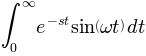

In [6]:
laplaceSinIntegral = sp.Integral(sp.sin(omega*t)*sp.exp(-s*t), (t,0,oo))
laplaceSinIntegral

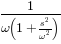

In [7]:
laplaceSinIntegral.doit()

We can Laplace transform a constant (this is important for boundary conditions):

In [8]:
sp.integrate(C0*sp.exp(-s*t), (t,0,oo))

In [ ]:
?sp.laplace_transform

In [9]:
sp.laplace_transform(sp.sin(t), t, s)

(1/(s**2 + 1), 0, True)

In [10]:
sp.laplace_transform(sin(omega*t), t, s)[0]

In [11]:
sp.laplace_transform(C0, t, s)

(C0/s, 0, True)

### In Class - Part I
----

#### The Laplace Transform of Derivatives

This is where the strength of the method is realized.  We will use the product rule to develop an expression for the Laplace transform of a derivative with respect to time and space.  In time the transform requires integration by parts.  In space we require differentiation under the integral.

Start with our symbolic representation of a derivative quantity

In [12]:
sp.diff(f(x,t),x)

Let us apply the laplace transform function to this definition:

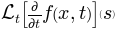

In [13]:
sp.laplace_transform(sp.diff(f(x,t),t), t, s)

`sympy` is being strictly correct, but unhelpful.  A short discussion on integration by parts will help you to understand the textbook definition of the Laplace transform of a derivative.

I think of integration by parts now a little differently than when I learned it.  [Wikipedia's description](https://en.wikipedia.org/wiki/Integration_by_parts) is closer to how I think about things now.  Start by applying the product (chain?) rule to the product of functions:

$$
\frac{d}{dx} (u(x)v(x)) = u(x)\frac{dv(x)}{dx} + v(x)\frac{du(x)}{dx}
$$

then integrate and re arrange:

$$
\int u(x) v'(x) \, dx = u(x) v(x) - \int v(x) \, u'(x) dx
$$

We can apply similar logic to define the Laplace transform of the derivative of $f(t)$.  We can start by differentiating the product 

$$f(x,t) e^{-st}$$

In [14]:
sp.diff(f(x,t)*sp.exp(-s*t),t)

We can write the integral of the product (`sympy` will not evaluate this for us because of the use of `Integral`). We can call for integration with the `doit()` method:

In [ ]:
leftHandSide = sp.Integral(sp.Derivative(f(x,t)*sp.exp(-s*t),t),(t,0,oo))
leftHandSide

By the fundamental theorem of the Calculus this expression is:

$$
[e^{-st}f(t)] \, \Big |^{\,t=\infty}_{\, t=0}
$$

Here we use a little bit of code to write the Integral for each term produced by the product rule:

In [ ]:
expandedDerivative = sp.diff(f(x,t)*sp.exp(-s*t),t)
[sp.Integral(terms,(t,0,oo)) for terms in expandedDerivative.args]

Making our whole definition:

$$
\mathcal{L}(f_t) = \int_{0}^{\infty} e^{- s t} \frac{\partial f(x,t)}{\partial t}\, dt = [e^{-st}f(t)] \, \Big |^{\,t=\infty}_{\, t=0} + \int_{0}^{\infty} s f{\left (x,t \right )} e^{- s t}\, dt
$$

Where the $t$ subscript refers to differentiation in time.  It's that simple.  Some texts will continue from this point and define, generally, the Laplace transform of an n'th derivative.  The only remaining wrinkle is to find the Laplace transform of a spatial derivative and then we have all the tools we need to solve the diffusion equation using Laplace transforms.  

[Top of Page](#Sections)

To find the Laplace transform of the derivative of $f$ with respect to $x$, let us start with `sympy`:

In [ ]:
sp.laplace_transform(sp.diff(f(x,t),x), t, s)

OK.  So - we need to dive a bit deeper on how to define things here.  The quick answer is that you can change the order of operations.  

The longer answer is that the operations for [differentiation under the integral](https://en.wikipedia.org/wiki/Leibniz_integral_rule) commute under certain conditions.  The previous link and [this](https://en.wikipedia.org/wiki/Interchange_of_limiting_operations) one provide some needed background. We've encountered this idea before when we define cross derivatives under partial differentiation:

$$
\frac{\partial}{\partial y} \left( \frac{\partial f}{\partial x} \right) \equiv \frac{\partial^2 f}{\partial y \partial x} = \frac{\partial^2 f}{\partial x \partial y}
$$

For what it's worth - I scanned my calculus texbook and an applied math text and neither text indexes this rule for easy reference.  I'm not sure how you would learn this on your own - except to rationalize that integration and differentiation are limit processes and if the variables of the limits are independent then maybe the operations commute.  The diffusion text (from which I pulled this discussion) does not provide reference or proof that the limit operations (i.e. differentation and integration) can be interchanged - the text merely says that it can be done.

$$
\mathcal{L}\left( \frac{\partial^2 f(x,t)}{\partial x^2} \right) = \frac{\partial^2}{\partial x^2} \mathcal{L} (f(x,t)) = \frac{\partial^2 A(x)}{\partial x^2}
$$

Ultimately, once you use the Laplace transform on the diffusion equation:

$$
D \frac{\partial^2 c}{\partial x^2} = \frac{\partial c}{\partial t}
$$

you end up with an ordinary differential equation in x alone.  The time dependence is removed by the integral.  A is the tranformed function:

$$
D \frac{\partial^2 A(x)}{\partial x^2} = s A(x)
$$

[Top of Page](#Sections)

### In Class - Part II
----

#### Solving a Differential Equation Using Laplace Transforms

Solving this differential equation is as simple as calling DSolve and investigating the behavior at the boundaries.  Don't forget to transform the boundary conditions, too.  The notation "A" here is used to remind you that after the Laplace transform we are in a different space.

In [15]:
import sympy as sp
sp.init_printing()

In [16]:
f = sp.symbols('f', cls=sp.Function)
x = sp.symbols('x', real=True)
s = sp.symbols('s', real=True, positive=True)
C0, D = sp.symbols('C0 D', real=True, positive=True)
C1, C2 = sp.symbols('C1 C2')
t = sp.symbols('t', real=True, positive=True)

The problem of interest here is one where the substance, $c(x,t)$ is diffusing into an semi-infinite ($0 \leq x \leq \infty$) medium that is initially devoid of any solute (e.g. $c(x,0) = 0$).  Note that this initial condition explicitly sets the value of one of the terms in the Laplace transform of the time derivative of $c(x,t)$.  By virtue of a Laplace transform of Fick's law:

$$
\frac{\partial c(x,t)}{\partial t} = D \frac{\partial^2 c(x,t)}{\partial x^2}
$$

we arrive at the differential equation of interest (where `f` is the Laplace transform of $c(x,y)$:

$$
\left. s \,\, f(x) - f(x) \right|_{t=0} = D \frac{\partial^2 f(x)}{\partial x^2}
$$

in one variable, $x$ as we've integrated the time variable out of the PDE by the Laplace transform.  The second term on the LHS is zero by virtue of the initial conditions.

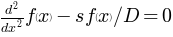

In [17]:
equationToSolve = sp.Eq((sp.diff(f(x),x,2) - (s/D)*f(x)),0)
equationToSolve

Calling `sp.dsolve` to find the function $f(x)$ we get:

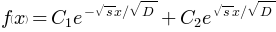

In [18]:
solutionToEquation = sp.dsolve(equationToSolve,f(x))
solutionToEquation

#### Applying the Boundary Conditions

Now we use the boundary conditions to evaluate the constants.  What happens as x goes to infinity?

In [19]:
solutionToEquation.subs(x,sp.oo)

C2 must therefore be zero.  We also know that at $x=0$ and $t=0$ the concentration of the diffusant is $C_0$.  We Laplace transform this boundary condition:

In [20]:
sp.laplace_transform(C0,t,s)

In [21]:
solutionToEquation.subs([(C2,0),(x,0)])

Identifying that $C_1 = C_0/s$.  Making the final substitutions:

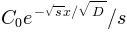

In [22]:
thingToInverseTransform = solutionToEquation.subs([(C2,0),(C1,C0/s)])
thingToInverseTransform.rhs

You can use the `rhs` and `lhs` attributes to get the bits of the functions you are interested in.

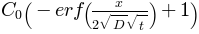

In [23]:
sp.inverse_laplace_transform(thingToInverseTransform.rhs, s, t)

It helps to know that $\mathrm{erfc}(z) = 1 - \mathrm{erf}(z)$.  With this substition our final equation for the domain $\{x\, |\, 0 \leq x \leq \infty \}$ is:

$$
c(x,t) = C_0 \, \mathrm{erfc} \left( \frac{x}{2\sqrt{Dt}} \right)
$$

#### DIY:  Plot the solution and use `interact` to explore the effect of variables

In [ ]:
# Your code goes here.

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from ipywidgets import interact, fixed 

def awesomeLaplaceFunction(x):
    return x**2

def makeAwesomePlotForProfLewis(x_finish, numPoints):
    # create a linspace that has 0 to x_finish
    # set to "x" value
    x = np.linspace(start=0, stop=x_finish, num=numPoints)
    
    # call awesomeLaplaceFunction and set to "y" value.
    y = awesomeLaplaceFunction(x)
    
    # make a plot (I will copy code from elsewhere for this one)
    fig = plt.figure()

    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

    axes.semilogx(xb, gamma, 'r')

    # Setting the y-limit cleans up the plot.
    axes.set_ylim([0,0.8])
    axes.set_xlabel('Bulk Concentration $x_b$')
    axes.set_ylabel('Surface Tension $\gamma$')
    axes.set_title('Surface Tension Change due to Adsorption');
    
    return None

interact(makeAwesomePlotForProfLewis, (arg1,0,1), (arg2,0,1));

_Question:  All those times we write $x \propto \sqrt{DT}$ what are we really saying?  Did playing with the values above give you some insight?_

### Diffusion from a Point Source Located at the Origin

![](./images/point_source.png)

You won't have the above figure, but you should be able to make your own `interact` visualization to make one of your own.

Recall that the transform of:

$$
\frac{\partial c(x,t)}{\partial t} = D \frac{\partial^2 c(x,t)}{\partial x^2}
$$

is:

$$
\left. s \,\, f(x) - f(x) \right|_{t=0} = D \frac{\partial^2 f(x)}{\partial x^2}
$$

where $f$ is the Laplace transform of $c$.

Now we consider a point source located at the origin of our coordinate system.  Note that $c(x,0) = 0$ everywhere EXCEPT at $x=0$ where we have an amount of substance $M$.

In this problem we are solving over all space.  Recalling our general solution to this problem in Laplace space:

$$
f{\left (x \right )} = C_{1} e^{- \frac{\sqrt{s} x}{\sqrt{D}}} + C_{2} e^{\frac{\sqrt{s} x}{\sqrt{D}}}
$$

Let us examine the behavior of $C_1$ and $C_2$.  As $x \rightarrow \infty$, $C_2$ must be zero and as $x \rightarrow -\infty$, $C_1$ must go to zero to ensure that the solution remains finite.

So we can use the symmetry of the problem to our advantage to help us arrive at a solution.

The mass that will diffuse into the $x>0$ part of the system will be $M/2$ so we can define the equation we want to solve, and then Laplace transform the LHS boundary condition.

In [ ]:
# some initial imports.

import sympy as sp
sp.init_printing()

In [ ]:
f, c = sp.symbols('f c', cls=sp.Function)
x = sp.symbols('x', real=True)
s = sp.symbols('s', real=True, positive=True)
C0, D, M = sp.symbols('C0 D M', real=True, positive=True)
C1, C2 = sp.symbols('C1 C2')
t = sp.symbols('t', real=True, positive=True)

A quick reminder of the differential equation of interest:

$$
\left. s \,\, f(x) - f(x) \right|_{t=0} = D \frac{\partial^2 f(x)}{\partial x^2}
$$

In [ ]:
equationToSolve = None
equationToSolve

Now we invoke `dsolve`.

In [ ]:
solutionToEquation = sp.dsolve(equationToSolve,f(x))
solutionToEquation

Consider the solution and what the values of the constants must be given the physical constraints on the problem.  Reason out the value of one of the constants and substitute.

In [ ]:
solutionXPositive = solutionToEquation # What substitution do you have to make?
solutionXPositive

Let us write a definite integral for our mass constraint

$$
\int^\infty_0 c(x,t) = \frac{M}{2}
$$

In [ ]:
massConstraint = sp.Eq(sp.Integral(c(x,t),(x,0,sp.oo)),M/2)
massConstraint

In order to use the integral as a boundary condition we need to Laplace transform both sides of the equation.  What do we know?

* The LHS is a limit process independent of the variable of the transform.
* The RHS is a constant.

In [ ]:
[sp.laplace_transform(massConstraint.lhs, t, s), \
 sp.laplace_transform(massConstraint.rhs, t, s)]

In [ ]:
solutionXPositive

Inspecting the above and changing the order of integration operations (i.e. move the Laplace transform inside the other integral) in the transform of the mass constraint, we know the following must be true.

In [ ]:
massConstraintIntegral = sp.Eq(sp.Integral(solutionXPositive.rhs,\
                                           (x,0,sp.oo)),M/2/s)
massConstraintIntegral

Do the integration:

In [ ]:
massConstraintEvaluated = massConstraintIntegral.doit()
massConstraintEvaluated

Solve for the contant.

In [ ]:
constantOne = sp.solveset(massConstraintEvaluated,C1)
constantOne

In the cell below - put your value for $C_1$ as determined above.

In [ ]:
finalResults = solutionXPositive.subs(C1, None)
finalResults

Invert the transformation.

In [ ]:
sp.inverse_laplace_transform(finalResults.rhs, s, t)

Our final solution is then:

$$
c(x,t) = \frac{M}{2\sqrt{\pi D t}} \exp \left(- \frac{x^{2}}{4 D t} \right)
$$


[Top of Page](#Sections)

### DIY:  Use `interact` to create a visualization of the above solution.

In [ ]:
# Your code goes here.


[Top of Page](#Sections)

### Homework
----

1.  Write a function that sums the contributions from an arbitrary number of point sources located at an arbitrary position along the 1D space.  (e.g. one point source at $x=1$ and another at $x=5$, etc.)
1.  Generalize this to an infinite number of point sources located in the half domain $-\infty \leq x \leq 0$.  When done correctly (integrate!) you will get the diffusion couple solution.  This is a standard diffusion analysis technique meaning that there are plenty of resources available describing the procedure.

[Top of Page](#Sections)

### Looking Ahead
----

Next topic is numerical solutions to the diffusion equation.  We have examined the analytical methods so that we begin building foundational knowledge of "standard" diffusion geometries and solutions.  This gives us a way to check our numerical solutions and the errors that are part of said solutions.  

We will be once again looking at storing numerical data in arrays and operations on those arrays.  The main intellectual challenge will be thinking of arrays of numerical data as different "states" of the system.  The operations on those arrays are governed by the differential governing equations.

[Top of Page](#Sections)

### Reading Assignments and Practice
----

* The solutions here are found in standard texbooks.  You can look at authors such as: Crank, Shewmon, and Glicksman.  Some texts are more mathematical than others - some are more materials focused than others.
* Having access to a table of Laplace transforms will be helpful.  The computer algebra system doesn't really provide that much help in the cases above.  Mostly it keeps you from making silly mistakes.  So - practice with a transforms table by your side.
* Try and solve some diffusion problems that you devise yourself.  See if you can get to the point where you understand that there is really only one solution - it is just that the solutions are re-scaled for each case.

[Top of Page](#Sections)